In [2]:
##librerias
import numpy as np
import sympy as sp
import math as mt
import matplotlib.pyplot as plt
from math import pi,cos,sin


In [3]:
"constantes"
L = 2
H = 1
alfa = np.arctan((H)/(L)) 
A = 1200
esf = 21*(10**-3)
esf

0.021

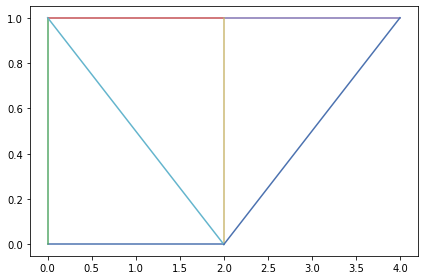

In [4]:
"grafica de la armadura"
plt.style.use('seaborn-deep')
plt.plot([0,L],[0,0])
plt.plot([0,0],[0,H])
plt.plot([0,L],[H,H])
plt.plot([L,2*L],[H,H])
plt.plot([L,L],[0,H])
plt.plot([0,L],[H,0])
plt.plot([L,2*L],[0,H])
plt.tight_layout()

In [21]:
"ecuaciones equilibrio externo"

    "R_Dx = -4*P*np.cos(teta*np.pi/180)"
    "R_Ax = -1*P*np.sin(teta*np.pi/180) - R_Dx"
    "R_Ay = -1*P*np.cos(teta*np.pi/180)"

"ecuaciones de los elementos (se desprecian lo elementos con fuerza cero)
    "Nde = -R_Dx"
    "Nae = Ay/np.sin(alfa)""
    "Nab = -Ax - (Ay/np.sin(alfa))*np.cos(alfa)""
    "Nbc = Nab"
    "Nce = (carga*np.sin(angulo*np.pi/180) - Nbc)/np.cos(alfa)"

In [5]:
"arrays de los angulos y de las cargas en KN"
rango_angulos = np.arange(0,190,10)
rango_carga = np.arange(20,24.75,0.25)
rango_carga

array([20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  ,
       22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25,
       24.5 ])

In [6]:
"calculamos las fuerzas internas y reacciones enfuncion de cada angulo y su respectivo valor de carga"
rango_Dx = ([])
rango_Ax = ([])
rango_Ay = ([])
rango_Nde = ([])
rango_Nae = ([])
rango_Nab = ([])
rango_Nbc= ([])
rango_Nce= ([])

for angulo,carga in zip(rango_angulos , rango_carga):
    Dx = -4*carga*np.cos(angulo*np.pi/180)
    Ax = -1*carga*np.sin(angulo*np.pi/180) - Dx
    Ay = -1*carga*np.cos(angulo*np.pi/180)
    Nde = -Dx
    Nae = Ay/np.sin(alfa)
    Nab = -Ax - (Ay/np.sin(alfa))*np.cos(alfa)
    Nbc = Nab
    Nce = (carga*np.sin(angulo*np.pi/180) - Nbc)/np.cos(alfa)
    
    rango_Dx.append(Dx)
    rango_Ax.append(Ax)
    rango_Ay.append(Ay)
    rango_Nde.append(Nde)
    rango_Nae.append(Nae)
    rango_Nab.append(Nab)
    rango_Nce.append(Nce)
    rango_Nbc.append(Nbc)
   

print(rango_Nab)

[-40.0, -36.368338399239086, -31.51598451404604, -25.565054257054207, -18.67532680757975, -11.040028995399641, -2.8804538186345745, 5.56043826742691, 14.02525074892364, 22.249999999999996, 29.972342437786544, 36.93992364419734, 42.91858428704208, 47.70015715294031, 51.10959765422563, 53.01120667976084, 53.31372923753965, 51.97414432951515, 49.0]


In [7]:
abs_Nde = ([])
for i in rango_Nde:
    abs_Nde.append(abs(i))

abs_Nae = ([])
for i in rango_Nae:
    abs_Nae.append(abs(i))
    
abs_Nab = ([])
for i in rango_Nab:
    abs_Nab.append(abs(i))
    
abs_Nce = ([])
for i in rango_Nce:
    abs_Nce.append(abs(i))

abs_Nbc = ([])
for i in rango_Nbc:
    abs_Nbc.append(abs(i))

abs_Nbc.index(max(abs_Nbc))

rango_angulos[abs_Nbc.index(max(abs_Nbc))]

160

In [8]:
#elementos con sus maximas magnitudes, condiciones de feurza interna, angulo y carga
if abs(max(rango_Nab)) < abs(min(rango_Nab)) :
    estado_Nab = "compresion"
    print("max AB es de "+str(min(rango_Nab))+" KN a "+str(estado_Nab)+" angulo="+str(rango_angulos[abs_Nab.index(max(abs_Nab))])+" p="+str(rango_carga[abs_Nab.index(max(abs_Nab))]))
    else:
    estado_Nab = "tension" 
    print("max AB es de "+str(max(rango_Nab))+" KN a "+str(estado_Nab)+" angulo="+str(rango_angulos[abs_Nab.index(max(abs_Nab))])+" p="+str(rango_carga[abs_Nab.index(max(abs_Nab))]))


if abs(max(rango_Nbc)) < abs(min(rango_Nbc)) :
    estado_Nbc = "compresion"
    print("max BC es de "+str(min(rango_Nbc))+" KN a "+str(estado_Nbc)+" angulo="+str(rango_angulos[abs_Nbc.index(max(abs_Nbc))])+" p="+str(rango_carga[abs_Nbc.index(max(abs_Nbc))]))
    else:
    estado_Nbc = "tension" 
    print("max BC es de "+str(max(rango_Nbc))+" KN a "+str(estado_Nbc)+" angulo="+str(rango_angulos[abs_Nbc.index(max(abs_Nbc))])+" p="+str(rango_carga[abs_Nbc.index(max(abs_Nbc))]))


if abs(max(rango_Nce)) < abs(min(rango_Nce)) :
    estado_Nce = "compresion"
    print("max CE es de "+str(min(rango_Nce))+" KN a "+str(estado_Nce)+" angulo="+str(rango_angulos[abs_Nce.index(max(abs_Nce))])+" p="+str(rango_carga[abs_Nce.index(max(abs_Nce))]))
    else:
    estado_Nce = "tension" 
    print("max CE es de "+str(max(rango_Nce))+" KN a "+str(estado_Nce)+" angulo="+str(rango_angulos[abs_Nce.index(max(abs_Nce))])+" p="+str(rango_carga[abs_Nace.index(max(abs_Nce))]))


if abs(max(rango_Nde)) < abs(min(rango_Nde)) :
    estado_Nde = "compresion"
    print("max DE es de "+str(min(rango_Nde))+" KN a "+str(estado_Nde)+" angulo="+str(rango_angulos[abs_Nde.index(max(abs_Nde))])+" p="+str(rango_carga[abs_Nde.index(max(abs_Nde))]))
    else:
    estado_Nbc = "tension" 
    print("max DE es de "+str(max(rango_Nde))+" KN a "+str(estado_Nde)+" angulo="+str(rango_angulos[abs_Nde.index(max(abs_Nde))])+" p="+str(rango_carga[abs_Nade.index(max(abs_Nde))]))


if abs(max(rango_Nae)) < abs(min(rango_Nae)) :
    estado_Nae = "compresion"
    print("max AE es de "+str(min(rango_Nae))+" KN a "+str(estado_Nae)+" angulo="+str(rango_angulos[abs_Nae.index(max(abs_Nae))])+" p="+str(rango_carga[abs_Nae.index(max(abs_Nae))])
    else:
    estado_Nae = "tension" 
    print("max AE es de "+str(max(rango_Nae))+" KN a "+str(estado_Nae)+" angulo="+str(rango_angulos[abs_Nae.index(max(abs_Nae))])+" p="+str(rango

SyntaxError: invalid syntax (Temp/ipykernel_19872/2839526612.py, line 5)

In [9]:
#esfuerzos en Gpa. los elementos con fuerza interna mayor a 25.2[KN] van a fallar   (Area*EsfMax = 25.2)  
esf_Nab = ([])
esf_Nbc = ([])
esf_Nce = ([])
esf_Nde = ([])
esf_Nae = ([])
for i in rango_Nab :
    esf_Nab.append(i/A)
for i in rango_Nbc :
    esf_Nbc.append(i/A)
for i in rango_Nce :
    esf_Nce.append(i/A)
for i in rango_Nde :
    esf_Nde.append(i/A)
for i in rango_Nae :
    esf_Nae.append(i/A)

In [10]:
#vamos a imprimir un array con la fuerza interna de cada elemento en el orden sugerido para cada configuracion de cargas
# AB, BC, CE, DE, AE
for i in range(19):
    arr_i = ([])
    arr_i.append(rango_Nab[i])
    arr_i.append(rango_Nbc[i])
    arr_i.append(rango_Nce[i])
    arr_i.append(rango_Nde[i])
    arr_i.append(rango_Nae[i])
    print(str(i*10)+str(arr_i))

0[-40.0, -40.0, 44.721359549995796, 80.0, -44.721359549995796]
10[-36.368338399239086, -36.368338399239086, 44.592465880208444, 79.76942799398886, -44.592465880208444]
20[-31.51598451404604, -31.51598451404604, 43.07493984966057, 77.05479490444449, -43.07493984966057]
30[-25.565054257054207, -25.565054257054207, 40.182202216901956, 71.88010851410841, -40.182202216901956]
40[-18.67532680757975, -18.67532680757975, 35.97147642060012, 64.34773322199415, -35.97147642060012]
50[-11.040028995399641, -11.040028995399641, 30.542981795016217, 54.63694682335585, -30.542981795016217]
60[-2.8804538186345745, -2.8804538186345745, 24.037730758122745, 43.00000000000001, -24.037730758122745]
70[5.56043826742691, 5.56043826742691, 16.63397131077156, 29.75575246933319, -16.63397131077156]
80[14.02525074892364, 14.02525074892364, 8.542360847508778, 15.281039634689876, -8.542360847508778]
90[22.249999999999996, 22.249999999999996, 3.972054645195637e-15, 5.449678256205722e-15, -3.0464627590946276e-15]
100[

In [11]:
## PUNTO 2

#como para teta=0 todos fallan vamos a ver que tipo de esfuerzo induce la falla en cada elemento
falla_teta_0 = ([])
falla_teta_0.append(rango_Nab[0])
falla_teta_0.append(rango_Nbc[0])
falla_teta_0.append(rango_Nce[0])
falla_teta_0.append(rango_Nde[0])
falla_teta_0.append(rango_Nae[0])

if falla_teta_0[0] > 0 :
    falla_AB = "esfuerzo a tension"
else:
    falla_AB = "esfuerzo a compresion"

if falla_teta_0[1] > 0 :
    falla_BC = "esfuerzo a tension"
else:
    falla_BC = "esfuerzo a compresion"

if falla_teta_0[2] > 0 :
    falla_CE = "esfuerzo a tension"
else:
    falla_CE = "esfuerzo a compresion"

if falla_teta_0[3] > 0 :
    falla_DE = "esfuerzo a tension"
else:
    falla_DE = "esfuerzo a compresion"

if falla_teta_0[4] > 0 :
    falla_AE = "esfuerzo a tension"
else:
    falla_AE = "esfuerzo a compresion"

print("la falla del elemento AB es inducida por "+str(falla_AB) +" con una fuerza interna de "+str(rango_Nab[0]))
print("la falla del elemento BC es inducida por "+str(falla_BC) +" con una fuerza interna de "+str(rango_Nbc[0]))
print("la falla del elemento CE es inducida por "+str(falla_CE) +" con una fuerza interna de "+str(rango_Nce[0]))
print("la falla del elemento DE es inducida por "+str(falla_DE) +" con una fuerza interna de "+str(rango_Nde[0]))
print("la falla del elemento AE es inducida por "+str(falla_AE) +" con una fuerza interna de "+str(rango_Nae[0]))

la falla del elemento AB es inducida por esfuerzo a compresion con una fuerza interna de -40.0
la falla del elemento BC es inducida por esfuerzo a compresion con una fuerza interna de -40.0
la falla del elemento CE es inducida por esfuerzo a tension con una fuerza interna de 44.721359549995796
la falla del elemento DE es inducida por esfuerzo a tension con una fuerza interna de 80.0
la falla del elemento AE es inducida por esfuerzo a compresion con una fuerza interna de -44.721359549995796


In [12]:
##aumento es de 0.01 (codigo:2182141 L=1)
aumento = np.arange(0.01,0.2,0.01)


unos = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
nalfa = unos*np.arctan((H)/(L+aumento)) 
print(nalfa)
print(len(nalfa))

[0.46165558 0.45967938 0.45771882 0.45577376 0.453844   0.4519294
 0.45002977 0.44814498 0.44627484 0.44441921 0.44257793 0.44075085
 0.43893781 0.43713867 0.43535328 0.43358148 0.43182315 0.43007814
 0.4283463 ]
19


In [13]:
# la letra "n" al inicio de los nombres es de es de "nuevo" para indicar que es un nuevo calculo
aumento = np.arange(0.01,0.2,0.01)
unos = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
nalfa = unos*np.arctan((H)/(L+aumento)) 
nrango_Dx = ([])
nrango_Ax = ([])
nrango_Ay = ([])
nrango_Nde = ([])
nrango_Nae = ([])
nrango_Nab = ([])
nrango_Nbc = ([])
nrango_Nce = ([])

for angulo,carga,aument,alf in zip(rango_angulos , rango_carga , aumento , nalfa):
    nDx = -(4+aument)*carga*np.cos(angulo*np.pi/180)
    nAx = -1*carga*np.sin(angulo*np.pi/180) - nDx
    nAy = -1*carga*np.cos(angulo*np.pi/180)
    nNde = -nDx
    nNae = nAy/np.sin(alf)
    nNab = -nAx - (nAy/np.sin(alf))*np.cos(alf)
    nNbc = nNab
    nNce = (carga*np.sin(angulo*np.pi/180) - nNbc)/np.cos(alfa)
    
    nrango_Nde.append(nNde)
    nrango_Nae.append(nNae)
    nrango_Nab.append(nNab)
    nrango_Nce.append(nNce)
    nrango_Nbc.append(nNbc)
print(nrango_Nde)
print(rango_Nde)

[80.19999999999999, 80.16827513395879, 77.63270586622784, 72.5989095992495, 65.15207988726908, 55.45650102570618, 43.75250000000001, 30.35086751871985, 15.624863026470397, 5.585920212610864e-15, -16.058115229749383, -32.05754803391493, -47.494999999999976, -61.87152137037784, -74.70848431517832, -85.56330989390254, -94.0444374882537, -99.82503788408246, -102.65500000000002]
[80.0, 79.76942799398886, 77.05479490444449, 71.88010851410841, 64.34773322199415, 54.63694682335585, 43.00000000000001, 29.75575246933319, 15.281039634689876, 5.449678256205722e-15, -15.628335990023727, -31.12383304263585, -45.99999999999998, -59.77924770084816, -72.00817765318392, -82.27241335952168, -90.2104915954472, -95.52635204218417, -98.0]


In [14]:
arr_1 = ([])
for i in range(19):
    arr_1.append("AB")
    arr_1.append(nrango_Nab[i])
    arr_1.append(rango_carga[i])

    arr_2 = ([])
for i in range(19):
    arr_2.append("BC")
    arr_2.append(nrango_Nbc[i])
    arr_2.append(rango_carga[i])

arr_3 = ([])
for i in range(19):
    arr_3.append("CE")
    arr_3.append(nrango_Nce[i])
    arr_3.append(rango_carga[i])

arr_4 = ([])
for i in range(19):
    arr_4.append("DE")
    arr_4.append(nrango_Nde[i])
    arr_4.append(rango_carga[i])
    
arr_5 = ([])
for i in range(19):
    arr_5.append("AE")
    arr_5.append(nrango_Nae[i])
    arr_5.append(rango_carga[i])

print(arr_1)
print(len(arr_1))

['AB', -39.99999999999999, 20.0, 'AB', -36.36833839923907, 20.25, 'AB', -31.515984514046053, 20.5, 'AB', -25.5650542570542, 20.75, 'AB', -18.675326807579758, 21.0, 'AB', -11.040028995399634, 21.25, 'AB', -2.8804538186345816, 21.5, 'AB', 5.5604382674269175, 21.75, 'AB', 14.02525074892364, 22.0, 'AB', 22.249999999999996, 22.25, 'AB', 29.972342437786544, 22.5, 'AB', 36.939923644197336, 22.75, 'AB', 42.91858428704208, 23.0, 'AB', 47.70015715294032, 23.25, 'AB', 51.10959765422563, 23.5, 'AB', 53.01120667976083, 23.75, 'AB', 53.313729237539654, 24.0, 'AB', 51.97414432951515, 24.25, 'AB', 49.000000000000014, 24.5]
57


In [15]:
arrai = ([])
for i in range(19):
    i = 3*i
    arrai.append(arr_1[i])
    arrai.append(arr_1[i+1])
    arrai.append(arr_1[i+2])
    arrai.append(arr_2[i])
    arrai.append(arr_2[i+1])
    arrai.append(arr_2[i+2])
    arrai.append(arr_3[i])
    arrai.append(arr_3[i+1])
    arrai.append(arr_3[i+2])
    arrai.append(arr_4[i])
    arrai.append(arr_4[i+1])
    arrai.append(arr_4[i+2])
    arrai.append(arr_5[i])
    arrai.append(arr_5[i+1])
    arrai.append(arr_5[i+2])
print(arrai)

['AB', -39.99999999999999, 20.0, 'BC', -39.99999999999999, 20.0, 'CE', 44.72135954999579, 20.0, 'DE', 80.19999999999999, 20.0, 'AE', -44.900334074481, 20.0, 'AB', -36.36833839923907, 20.25, 'BC', -36.36833839923907, 20.25, 'CE', 44.59246588020843, 20.25, 'DE', 80.16827513395879, 20.25, 'AE', -44.949559514316235, 20.25, 'AB', -31.515984514046053, 20.5, 'BC', -31.515984514046053, 20.5, 'CE', 43.07493984966059, 20.5, 'DE', 77.63270586622784, 20.5, 'AE', -43.59260527618039, 20.5, 'AB', -25.5650542570542, 20.75, 'BC', -25.5650542570542, 20.75, 'CE', 40.18220221690195, 20.75, 'DE', 72.5989095992495, 20.75, 'AE', -40.826383013928634, 20.75, 'AB', -18.675326807579758, 21.0, 'BC', -18.675326807579758, 21.0, 'CE', 35.971476420600126, 21.0, 'DE', 65.15207988726908, 21.0, 'AE', -36.692669214310925, 21.0, 'AB', -11.040028995399634, 21.25, 'BC', -11.040028995399634, 21.25, 'CE', 30.54298179501621, 21.25, 'DE', 55.45650102570618, 21.25, 'AE', -31.27816083777874, 21.25, 'AB', -2.8804538186345816, 21.5

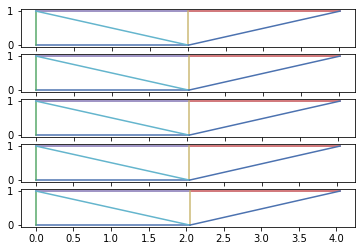

In [16]:
fig,axes = plt.subplots(nrows=5 , ncols=1)
for ax, aument in zip(axes, aumento) :
    ax.plot([0,(L+aument)],[0,0])
    ax.plot([0,0],[0,H])
    ax.plot([L+aument,(2+L+aument)],[H,H])
    ax.plot([0,(L+aument)],[H,H])
    ax.plot([L+aument,L+aument],[0,H])
    ax.plot([0,L+aument],[H,0])
    ax.plot([L+aument,(2+L+aument)],[0,H])

In [17]:
## teta_AB = 50 (codigo:2182141  A=4 B=1)
teta_AB = 50
P = 30
nnrango_Nde = ([])
nnrango_Nae = ([])
nnrango_Nab = ([])
nnrango_Nbc = ([])
nnrango_Nce = ([])

for aument, alf in zip(aumento, nalfa):
    nnDx = -(4+aument)*P*np.cos(teta_AB*np.pi/180)
    nnAx = -1*P*np.sin(teta_AB*np.pi/180) - nnDx
    nnAy = -1*P*np.cos(teta_AB*np.pi/180)
    nnNde = -nnDx
    nnNae = nnAy/np.sin(alf)
    nnNab = -nnAx - (nnAy/np.sin(alf))*np.cos(alf)
    nnNbc = nnNab
    nnNce = (P*np.sin(teta_AB*np.pi/180) - nnNbc)/np.cos(alfa) 
    nnrango_Nde.append(nnNde)
    nnrango_Nae.append(nnNae)
    nnrango_Nab.append(nnNab)
    nnrango_Nce.append(nnNce)
    nnrango_Nbc.append(nnNbc)
print(nnrango_Nab)
print(nrango_Nab)

[-15.585923287623025, -15.585923287623018, -15.585923287623032, -15.585923287623018, -15.585923287623032, -15.585923287623011, -15.585923287623032, -15.585923287623032, -15.585923287623025, -15.585923287623011, -15.58592328762304, -15.585923287623032, -15.585923287623018, -15.585923287623018, -15.58592328762304, -15.585923287623032, -15.585923287623011, -15.585923287623025, -15.58592328762304]
[-39.99999999999999, -36.36833839923907, -31.515984514046053, -25.5650542570542, -18.675326807579758, -11.040028995399634, -2.8804538186345816, 5.5604382674269175, 14.02525074892364, 22.249999999999996, 29.972342437786544, 36.939923644197336, 42.91858428704208, 47.70015715294032, 51.10959765422563, 53.01120667976083, 53.313729237539654, 51.97414432951515, 49.000000000000014]


In [18]:
#nuevos esfuerzos en Gpa
nesf_Nab = ([])
nesf_Nbc = ([])
nesf_Nce = ([])
nesf_Nde = ([])
nesf_Nae = ([])
for i in nnrango_Nab :
    nesf_Nab.append(i/A)
for i in nnrango_Nbc :
    nesf_Nbc.append(i/A)
for i in nnrango_Nce :
    nesf_Nce.append(i/A)
for i in nnrango_Nde :
    nesf_Nde.append(i/A)
for i in nnrango_Nae :
    nesf_Nae.append(i/A)

NameError: name 'Nb' is not defined

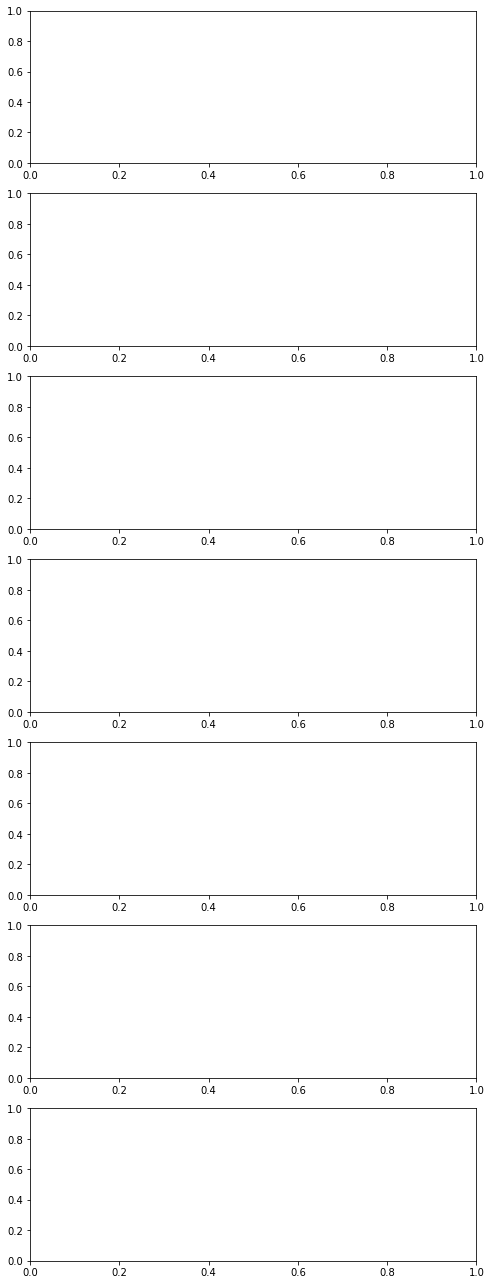

In [19]:
w_range = np.arange(0, 70, 10)
Uy_per_range = np.array([])
# asignar tamaño de mis plots
plt.rcParams["figure.figsize"] = (8, 23)

# subplots
fig, axes = plt.subplots(nrows=7, ncols=1)

for w, ax in zip(w_range, axes):
    
    
    # calcular deformaciones
    Uy = Nb * 1000 * LONGITUD / (area * E * np.cos(angulo))
    Uy_mm = Uy * 1000
    # agrego Uy en mm a la lista
    Uy_per_range = np.append(Uy_per_range, Uy_mm)
    
     # plotear en escala logaritmica
    ax.set_yscale('log')
    ax.plot([0, L_mm], [H_mm, H_mm - Uy_mm], marker='v', markersize=10)
    ax.plot([0, L_mm], [0, H_mm - Uy_mm], linestyle='--', color='black')
    # formatear etiquetas de los ejes
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.8f"))
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.8f"))
    # agregar numeros deseados   
    ax.set_yticks([H_mm - Uy_mm, H_mm])
    step = Uy_mm / 4 if Uy_mm else 0.0005
    ax.set_yticks(np.arange(H_mm - Uy_mm, H_mm, step), minor=True)
    # modificar tamaño de letras
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    # configuracion adicional
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')
    ax.set_title(f"Deformación para una carga de {w} [kN / m]")
    print(Uy_mm)

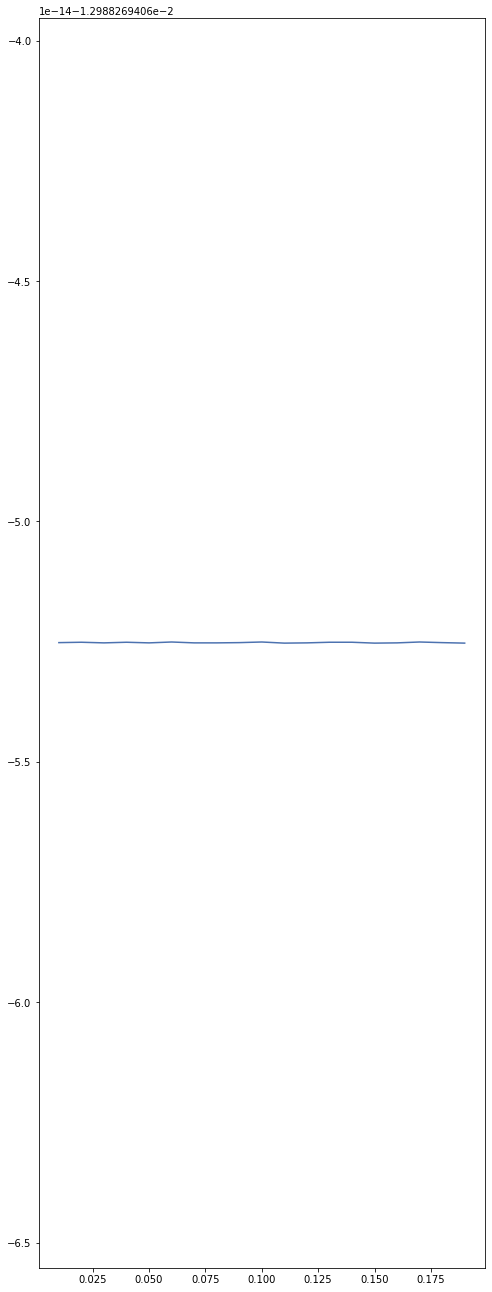

In [20]:
#grafica de esfuerzo en funcion de la variacion de los nodos para el lemento AB
grafica_AB = plt.plot(aumento,nesf_Nab)

In [ ]:
#grafica de esfuerzo en funcion de la variacion de los nodos para el lemento BC
grafica_BC = plt.plot(aumento,nesf_Nbc)

In [ ]:
#grafica de esfuerzo en funcion de la variacion de los nodos para el lemento CE
grafica_CE = plt.plot(aumento,nesf_Nce)

In [ ]:
#grafica de esfuerzo en funcion de la variacion de los nodos para el lemento DE
grafica_DE = plt.plot(aumento,nesf_Nde)

In [ ]:
#grafica de esfuerzo en funcion de la variacion de los nodos para el lemento AE
grafica_AE = plt.plot(aumento,nesf_Nae)